In [51]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

import warnings
warnings.filterwarnings('ignore')

## Data Loading and Extraction

In [52]:
import os
import zipfile
import torch

# Ensure GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Path to the uploaded zip file
zip_path = "archive (1).zip"
extract_path = "/content/dataset_folder"

# Extract to a specific directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

# Inspect the extracted structure
for dirname, _, filenames in os.walk(extract_path):
    print(f"Found {len(filenames)} files in {dirname}")
    print(f"Sample filenames: {filenames[:5]}")


Using device: cuda
Dataset extracted to: /content/dataset_folder
Found 0 files in /content/dataset_folder
Sample filenames: []
Found 0 files in /content/dataset_folder/TESS Toronto emotional speech set data
Sample filenames: []
Found 200 files in /content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust
Sample filenames: ['YAF_numb_disgust.wav', 'YAF_bite_disgust.wav', 'YAF_thought_disgust.wav', 'YAF_reach_disgust.wav', 'YAF_calm_disgust.wav']
Found 200 files in /content/dataset_folder/TESS Toronto emotional speech set data/OAF_angry
Sample filenames: ['OAF_fat_angry.wav', 'OAF_fail_angry.wav', 'OAF_dead_angry.wav', 'OAF_dodge_angry.wav', 'OAF_search_angry.wav']
Found 200 files in /content/dataset_folder/TESS Toronto emotional speech set data/YAF_angry
Sample filenames: ['YAF_long_angry.wav', 'YAF_half_angry.wav', 'YAF_late_angry.wav', 'YAF_red_angry.wav', 'YAF_shack_angry.wav']
Found 200 files in /content/dataset_folder/TESS Toronto emotional speech set data/OAF_neutr

## Data Cleaning

In [53]:
# Lists to store file paths and labels
paths = []
labels = []

# Path to the extracted dataset folder
dataset_dir = "/content/dataset_folder"

# Traverse through the dataset folder
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Append the full path to the file
        paths.append(os.path.join(dirname, filename))

        # Extract labels (assuming filenames follow a specific pattern)
        label = filename.split('_')[-1]  # Example: "image_label.jpg"
        label = label.split('.')[0]      # Remove file extension
        labels.append(label.lower())

    # Optional: Limit the number of files
    if len(paths) == 2800:
        break

print(f"Dataset loaded with {len(paths)} files.")


Dataset loaded with 2797 files.


In [54]:
print("Sample file paths:", paths[:5])
print("Sample labels:", labels[:5])


Sample file paths: ['/content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust/YAF_numb_disgust.wav', '/content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav', '/content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust/YAF_thought_disgust.wav', '/content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust/YAF_reach_disgust.wav', '/content/dataset_folder/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav']
Sample labels: ['disgust', 'disgust', 'disgust', 'disgust', 'disgust']


In [55]:
len(paths)

2797

In [56]:
df=pd.DataFrame()
df['audio_paths'] = paths
df['labels'] = labels
df.head()

,audio_paths,labels
0,/content/dataset_folder/TESS Toronto emotional...,disgust
1,/content/dataset_folder/TESS Toronto emotional...,disgust
2,/content/dataset_folder/TESS Toronto emotional...,disgust
3,/content/dataset_folder/TESS Toronto emotional...,disgust
4,/content/dataset_folder/TESS Toronto emotional...,disgust


In [57]:
df['labels'].value_counts()

,count
labels,
disgust,400
angry,400
neutral,400
happy,400
sad,400
ps,399
fear,398


## Data Visualization

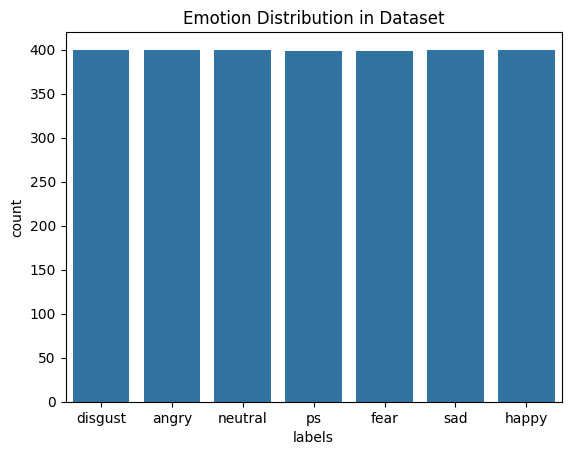

In [58]:
sns.countplot(data=df, x='labels')
plt.title('Emotion Distribution in Dataset')
plt.show()

In [59]:
def waveplot(data, sr, emotion):
  plt.figure(figsize = (10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

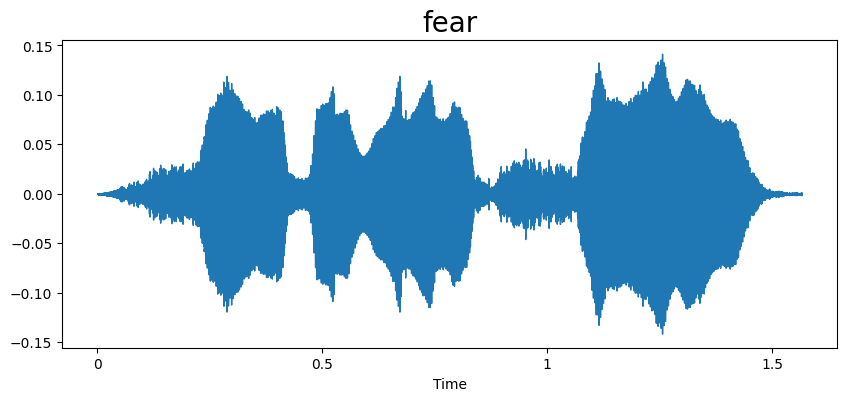

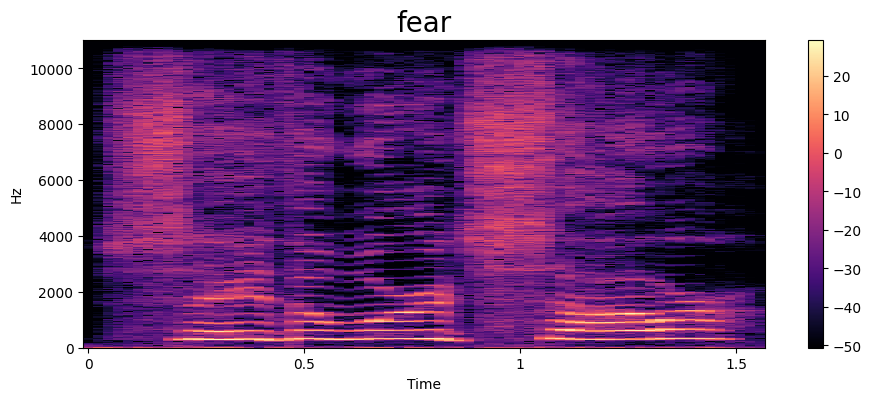

In [60]:
emotion = 'fear'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

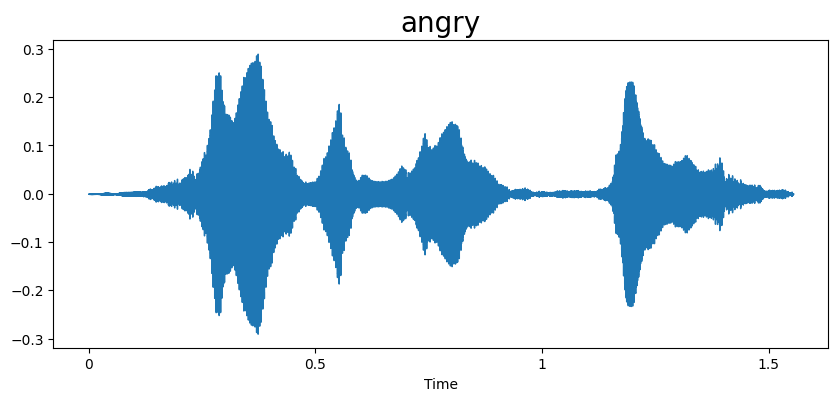

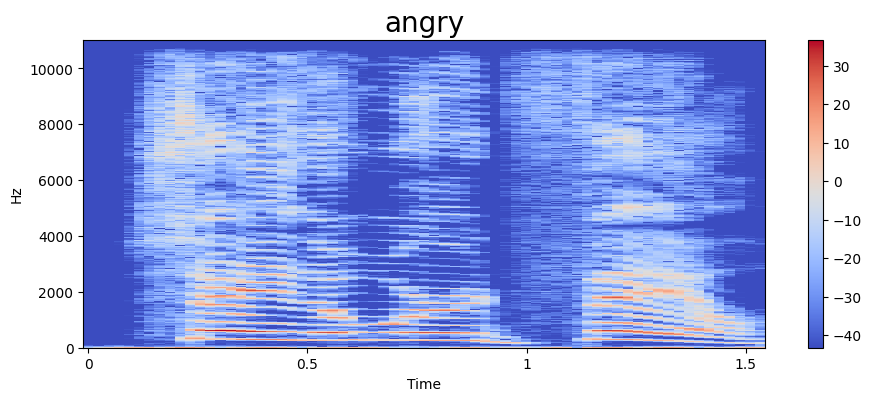

In [61]:
emotion = 'angry'
path = np.array(df['audio_paths'][df['labels']==emotion])[1]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

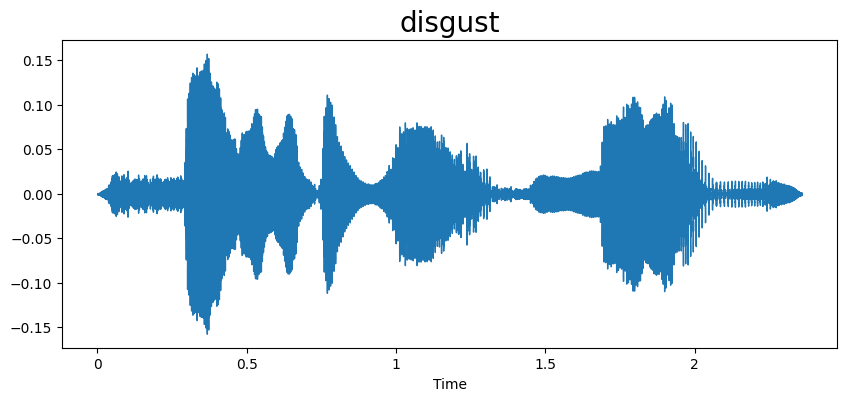

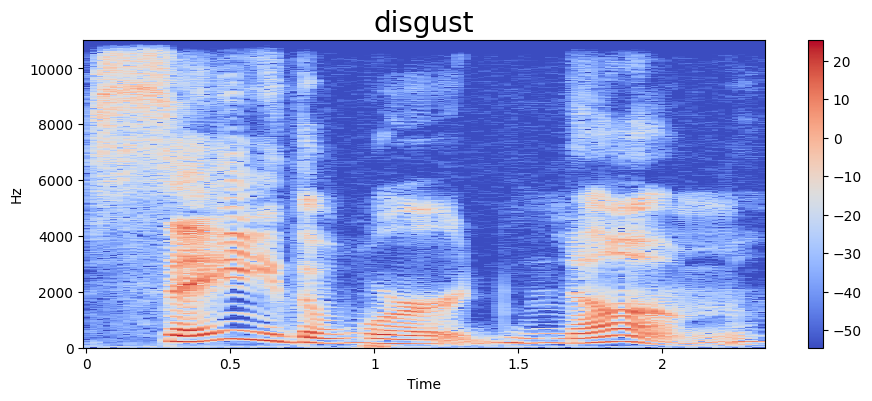

In [62]:
emotion = 'disgust'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

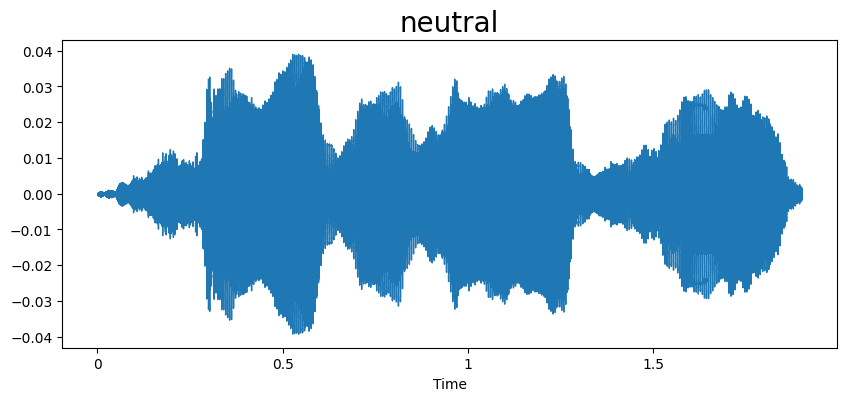

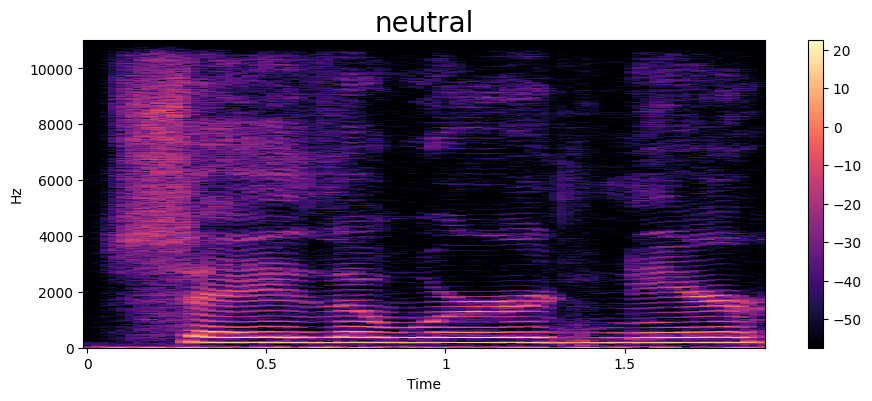

In [63]:
emotion = 'neutral'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

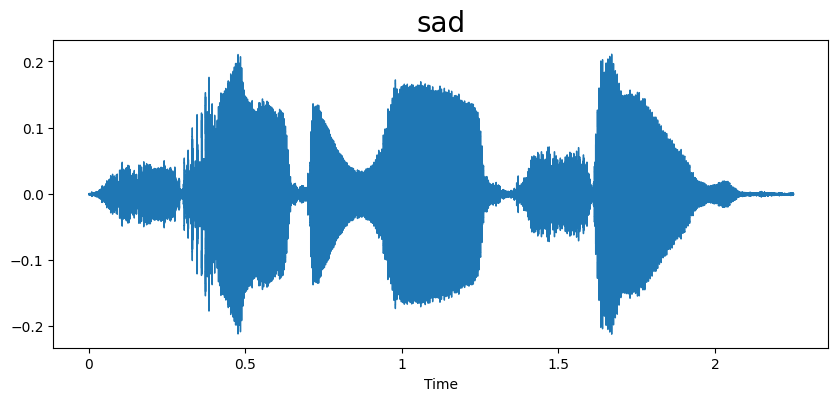

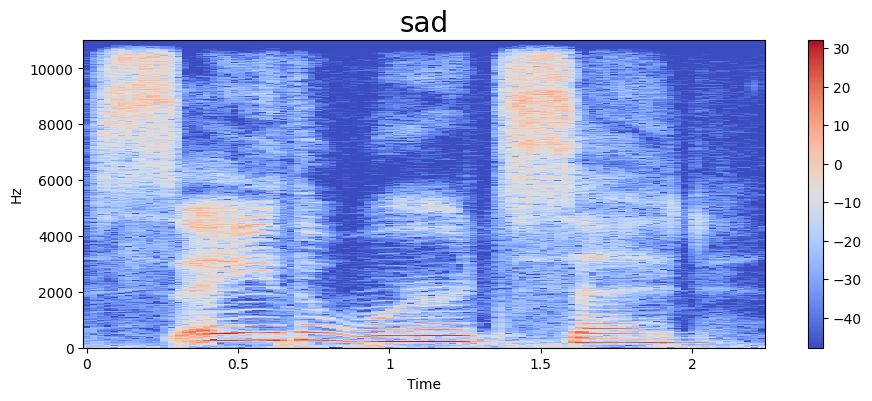

In [64]:
emotion = 'sad'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

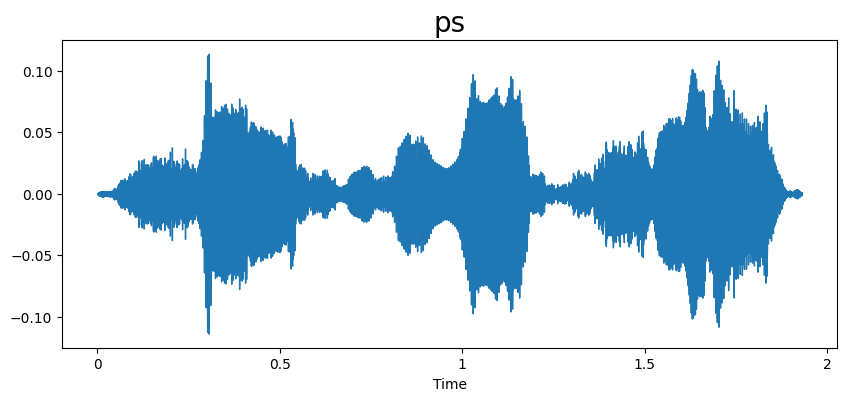

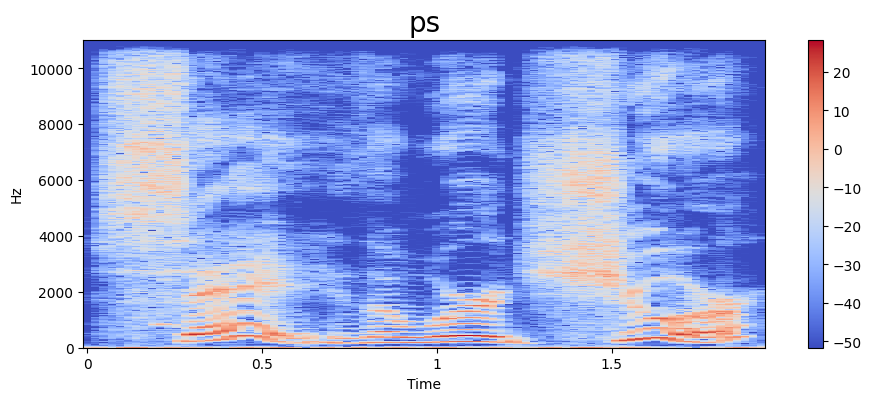

In [65]:
emotion = 'ps'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

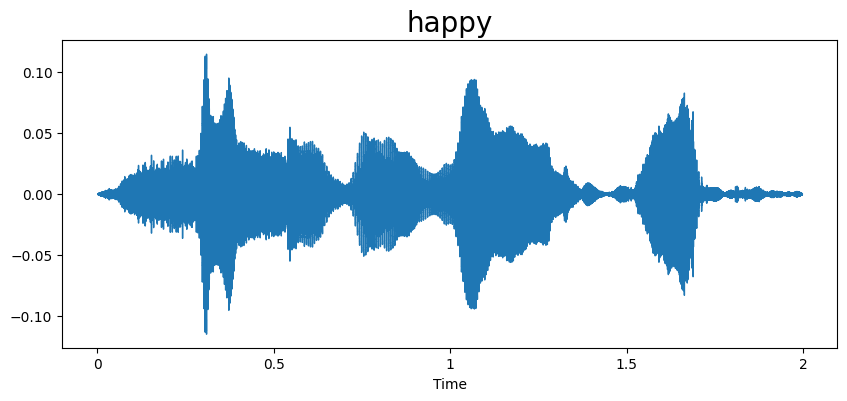

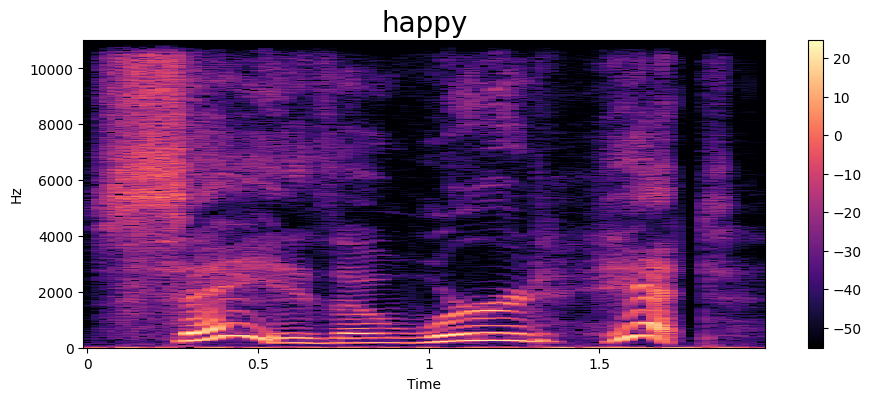

In [66]:
emotion = 'happy'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
if len(data) == 0:
    print(f"Skipping visualization for {emotion}, empty audio.")
else:
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

Audio(path)

In [67]:
df['labels'] = df['labels'].str.strip().str.lower()
label_map = {label: idx for idx, label in enumerate(df['labels'].unique())}
inverse_label_map = {idx: label for label, idx in label_map.items()}
df['labels'] = df['labels'].map(label_map)
df.head(2)

,audio_paths,labels
0,/content/dataset_folder/TESS Toronto emotional...,0
1,/content/dataset_folder/TESS Toronto emotional...,0


In [68]:
# Augmentation Function
def augment_audio(data):
    noise = np.random.normal(0, 0.01, len(data))
    return data + noise

In [69]:
# Dataset class
class SpeechEmotionDataSet(Dataset):
    def __init__(self, df, processor, max_length=32000):
        self.df=df
        self.processor=processor
        self.max_length=max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        audio_path=self.df.iloc[idx]['audio_paths']
        label=self.df.iloc[idx]['labels']

        # load the audio file
        speech, sr =librosa.load(audio_path, sr=16000)
        if np.random.rand() > 0.5:  # Apply augmentation randomly
          speech = augment_audio(speech)
        speech = librosa.util.normalize(speech)

        # pad or truncate the speech to the required length
        if len(speech) > self.max_length:
          speech = speech[:self.max_length]
        else:
          speech = np.pad(speech, (0, self.max_length - len(speech)), 'constant')

        # process the audio file
        inputs = self.processor(speech, sampling_rate=16000, return_tensors='pt', padding=True, truncate=True, max_length=self.max_length)

        input_values = inputs.input_values.squeeze()
        return {'input_values': input_values, 'labels':torch.tensor(label, dtype=torch.long)}


## Splitting Data

In [70]:
# split the data into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [71]:
# initialise the processor and model
processor = Wav2Vec2Processor.from_pretrained('facebook/wav2vec2-base')

In [72]:
# load the dataset
train_dataset = SpeechEmotionDataSet(train_df, processor)
test_dataset = SpeechEmotionDataSet(test_df, processor)

In [73]:
train_dataset[0]['input_values'].size()

torch.Size([32000])

## Model Initialization

In [74]:
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-base", num_labels=len(label_map))

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training Arguments

In [75]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to=[]
)

## Metric Computation

In [76]:
# compute metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import traceback
def compute_metrics(pred):
  try:
    labels = pred.label_ids   #original labels
    preds = np.argmax(pred.predictions, axis=1)   #model predicted label
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
  except Exception as e:
    print("Error in compute_metrics:",e," ")
    traceback.print_exc()
    return {}

## Training

In [ ]:
# initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.989208,0.717857,0.748169,0.717857,0.677520


## Evaluation

In [ ]:
results=trainer.evaluate()
print(results)

## **Test** **Predictions**

In [ ]:
import random
idx = random.randrange(0, len(test_dataset))
print('Original Label:', inverse_label_map[int(test_dataset[idx]['labels'])])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to(device)

with torch.no_grad():
  outputs = model(input_values)
logits = outputs.logits

predicted_class = logits.argmax(dim=1).item()
print('Predicted Label:', inverse_label_map[predicted_class])

## Real-Time Inference

In [ ]:
def predict_emotion(audio_path, model, processor):
  max_length = 32000
  speech, sr = librosa.load(audio_path, sr=16000)
  speech = speech[:max_length] if len(speech) > max_length else np.pad(speech, (0, max_length - len(speech)), 'constant')
  inputs = processor(speech, sampling_rate=16000, return_tensors='pt', padding=True)
  # Move input_values to the same device as the model
  device = next(model.parameters()).device  # Get the model's device
  inputs = inputs.to(device)  # Move inputs to the device
  with torch.no_grad():
    logits = model(inputs.input_values).logits
  predicted_class = logits.argmax(dim=1).item()
  return inverse_label_map[predicted_class]


In [ ]:
# Test the function
test_audio1 = '/content/YAF_chair_ps.wav'
print(predict_emotion(test_audio1, model, processor))

In [ ]:
# Test the function
test_audio2 = '/content/YAF_dab_happy.wav'
print(predict_emotion(test_audio2, model, processor))

In [ ]:
# Test the function
test_audio3 = '/content/audio_check1.wav'
print(predict_emotion(test_audio3, model, processor))

In [ ]:
# Test the function
test_audio4 = '/content/audio_check2.wav'
print(predict_emotion(test_audio4, model, processor))